# Introduction to the JupyterLab and Jupyter Notebooks

This is a short introduction to two of the flagship tools created by [the Jupyter Community](https://jupyter.org).

> **⚠️Experimental!⚠️**: This is an experimental interface provided by the [JupyterLite project](https://jupyterlite.readthedocs.io/en/latest/). It embeds an entire JupyterLab interface, with many popular packages for scientific computing, in your browser. There may be minor differences in behavior between JupyterLite and the JupyterLab you install locally. You may also encounter some bugs or unexpected behavior. To report any issues, or to get involved with the JupyterLite project, see [the JupyterLite repository](https://github.com/jupyterlite/jupyterlite/issues?q=is%3Aissue+is%3Aopen+sort%3Aupdated-desc).

## JupyterLab 🧪

**JupyterLab** is a next-generation web-based user interface for Project Jupyter. It enables you to work with documents and activities such as Jupyter notebooks, text editors, terminals, and custom components in a flexible, integrated, and extensible manner. It is the interface that you're looking at right now.

**For an overview of the JupyterLab interface**, see the **JupyterLab Welcome Tour** on this page, by going to `Help -> Welcome Tour` and following the prompts.

> **See Also**: For a more in-depth tour of JupyterLab with a full environment that runs in the cloud, see [the JupyterLab introduction on Binder](https://mybinder.org/v2/gh/jupyterlab/jupyterlab-demo/HEAD?urlpath=lab/tree/demo).

## Jupyter Notebooks 📓

**Jupyter Notebooks** are a community standard for communicating and performing interactive computing. They are a document that blends computations, outputs, explanatory text, mathematics, images, and rich media representations of objects.

JupyterLab is one interface used to create and interact with Jupyter Notebooks.

**For an overview of Jupyter Notebooks**, see the **JupyterLab Welcome Tour** on this page, by going to `Help -> Notebook Tour` and following the prompts.

> **See Also**: For a more in-depth tour of Jupyter Notebooks and the Classic Jupyter Notebook interface, see [the Jupyter Notebook IPython tutorial on Binder](https://mybinder.org/v2/gh/ipython/ipython-in-depth/HEAD?urlpath=tree/binder/Index.ipynb).

## An example: visualizing data in the notebook ✨

Below is an example of a code cell. We'll visualize some simple data using two popular packages in Python. We'll use [NumPy](https://numpy.org/) to create some random data, and [Matplotlib](https://matplotlib.org) to visualize it.

Note how the code and the results of running the code are bundled together.

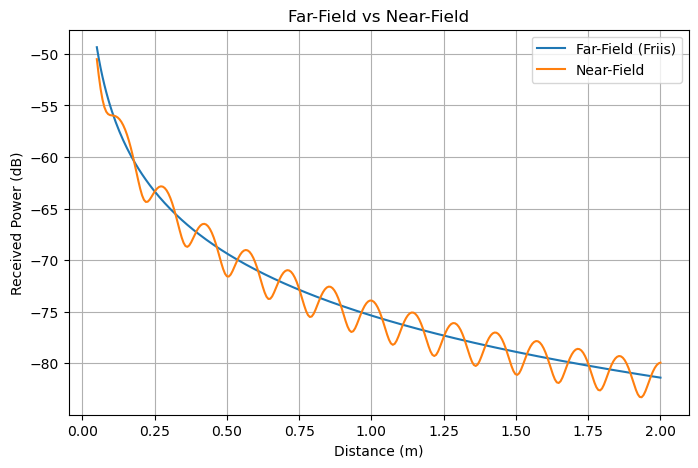

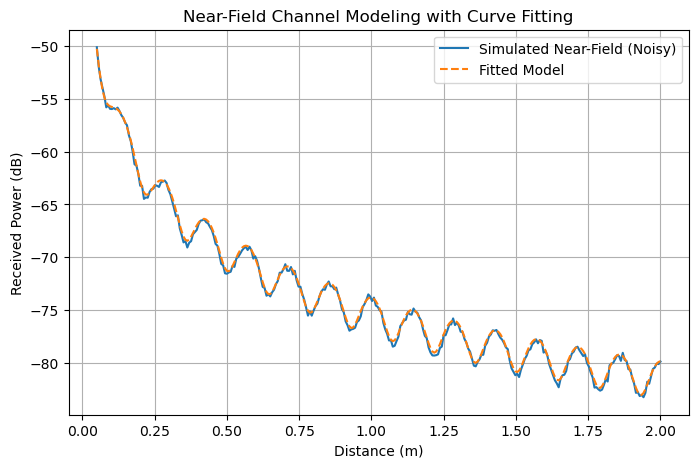

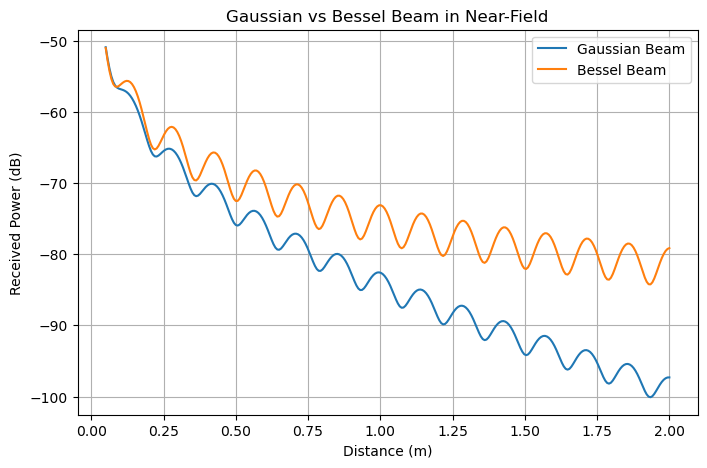

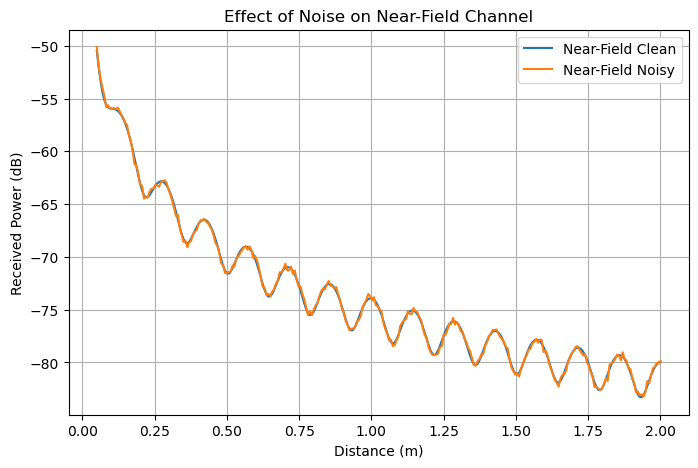

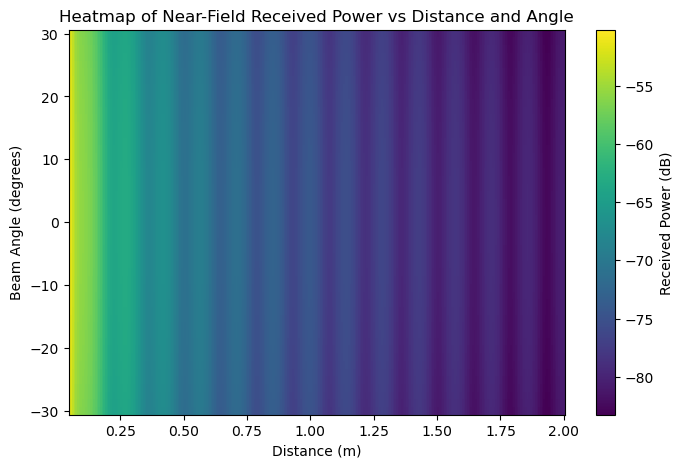

Fitted Parameters for Empirical Near-Field Model:
a = 3.0146e-08
b = 0.3838


In [2]:
# =========================================
# Near-Field Channel Modeling for Sub-THz
# Full Version with 5 Plots
# Ready for Jupyter Notebook
# =========================================

import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c
from scipy.optimize import curve_fit

# -----------------------------------------
# System Parameters
# -----------------------------------------
f = 140e9                # 140 GHz
wavelength = c / f
Pt = 1
d = np.linspace(0.05, 2.0, 300)  # distance in meters

# -----------------------------------------
# Far-Field Model (Friis)
# -----------------------------------------
def friis_model(d, wavelength):
    return (wavelength / (4*np.pi*d))**2

Pr_far = Pt * friis_model(d, wavelength)

# -----------------------------------------
# Near-Field Model
# -----------------------------------------
def near_field_model(d, wavelength):
    return (wavelength / (4*np.pi*d))**2 * (1 + 0.4*np.cos(2*np.pi*d/wavelength))

Pr_near = Pt * near_field_model(d, wavelength)

# -----------------------------------------
# Add Noise to Near-Field
# -----------------------------------------
np.random.seed(0)
noise = 0.05 * np.random.randn(len(d))
Pr_near_noisy = Pr_near * (1 + noise)

# -----------------------------------------
# Empirical Curve Fitting for Near-Field
# -----------------------------------------
def fitted_model(d, a, b):
    return (a/d**2) * (1 + b*np.cos(2*np.pi*d/wavelength))

params, _ = curve_fit(fitted_model, d, Pr_near_noisy)
Pr_fit = fitted_model(d, params[0], params[1])

# =========================================
# PLOT 1: Far-Field vs Near-Field
# =========================================
plt.figure(figsize=(8,5))
plt.plot(d, 10*np.log10(Pr_far), label="Far-Field (Friis)")
plt.plot(d, 10*np.log10(Pr_near), label="Near-Field")
plt.xlabel("Distance (m)")
plt.ylabel("Received Power (dB)")
plt.title("Far-Field vs Near-Field")
plt.legend()
plt.grid(True)
plt.show()

# =========================================
# PLOT 2: Near-Field + Curve Fitting
# =========================================
plt.figure(figsize=(8,5))
plt.plot(d, 10*np.log10(Pr_near_noisy), label="Simulated Near-Field (Noisy)")
plt.plot(d, 10*np.log10(Pr_fit), '--', label="Fitted Model")
plt.xlabel("Distance (m)")
plt.ylabel("Received Power (dB)")
plt.title("Near-Field Channel Modeling with Curve Fitting")
plt.legend()
plt.grid(True)
plt.show()

# =========================================
# PLOT 3: Gaussian Beam vs Bessel Beam
# =========================================
def gaussian_beam(d):
    return Pr_near * np.exp(-d/0.5)  # simplified Gaussian decay

def bessel_beam(d):
    return Pr_near * (1 + 0.2*np.cos(2*np.pi*d/wavelength))  # simplified Bessel effect

Pr_gaussian = gaussian_beam(d)
Pr_bessel = bessel_beam(d)

plt.figure(figsize=(8,5))
plt.plot(d, 10*np.log10(Pr_gaussian), label="Gaussian Beam")
plt.plot(d, 10*np.log10(Pr_bessel), label="Bessel Beam")
plt.xlabel("Distance (m)")
plt.ylabel("Received Power (dB)")
plt.title("Gaussian vs Bessel Beam in Near-Field")
plt.legend()
plt.grid(True)
plt.show()

# =========================================
# PLOT 4: Noise Effect (Near-Field Clean vs Noisy)
# =========================================
plt.figure(figsize=(8,5))
plt.plot(d, 10*np.log10(Pr_near), label="Near-Field Clean")
plt.plot(d, 10*np.log10(Pr_near_noisy), label="Near-Field Noisy")
plt.xlabel("Distance (m)")
plt.ylabel("Received Power (dB)")
plt.title("Effect of Noise on Near-Field Channel")
plt.legend()
plt.grid(True)
plt.show()

# =========================================
# PLOT 5: Heatmap 2D of Received Power
# Distance vs Beam Angle Simulation
# =========================================
angles = np.linspace(-30,30,50)  # beam angle in degrees
D, A = np.meshgrid(d, angles)
Pr_heatmap = (wavelength/(4*np.pi*D))**2 * (1 + 0.3*np.cos(2*np.pi*D/wavelength)) * np.cos(np.radians(A))

plt.figure(figsize=(8,5))
plt.pcolormesh(D, A, 10*np.log10(Pr_heatmap), shading='auto', cmap='viridis')
plt.colorbar(label="Received Power (dB)")
plt.xlabel("Distance (m)")
plt.ylabel("Beam Angle (degrees)")
plt.title("Heatmap of Near-Field Received Power vs Distance and Angle")
plt.show()

# =========================================
# Print Fitted Parameters
# =========================================
print("Fitted Parameters for Empirical Near-Field Model:")
print(f"a = {params[0]:.4e}")
print(f"b = {params[1]:.4f}")

## Next steps 🏃

This is just a short introduction to JupyterLab and Jupyter Notebooks. See below for some more ways to interact with tools in the Jupyter ecosystem, and its community.

### Other notebooks in this demo

Here are some other notebooks in this demo. Each of the items below corresponds to a file or folder in the **file browser to the left**.

- [**`Lorenz.ipynb`**](Lorenz.ipynb) uses Python to demonstrate interactive visualizations and computations around the [Lorenz system](https://en.wikipedia.org/wiki/Lorenz_system). It shows off basic Python functionality, including more visualizations, data structures, and scientific computing libraries.
- [**`r.ipynb`**](r.ipynb) demonstrates the R programming language for statistical computing and data analysis.
- [**`cpp.ipynb`**](cpp.ipynb) demonstrates the C++ programming language for scientific computing and data analysis.
- [**`sqlite.ipynb`**](sqlite.ipynb) demonstrates how an in-browser sqlite kernel to run your own SQL commands from the notebook. It uses the [jupyterlite/xeus-sqlite-kernel](https://github.com/jupyterlite/xeus-sqlite-kernel).

### Other sources of information in Jupyter

- **More on using JupyterLab**: See [the JupyterLab documentation](https://jupyterlab.readthedocs.io/en/stable/) for more thorough information about how to install and use JupyterLab.
- **More interactive demos**: See [try.jupyter.org](https://try.jupyter.org) for more interactive demos with the Jupyter ecosystem.
- **Learn more about Jupyter**: See [the Jupyter community documentation](https://docs.jupyter.org) to learn more about the project, its community and tools, and how to get involved.
- **Join our discussions**: The [Jupyter Community Forum](https://discourse.jupyter.org) is a place where many in the Jupyter community ask questions, help one another, and discuss issues around interactive computing and our ecosystem.